In [7]:
!pip install wbdata


  Using cached wbdata-1.1.0-py3-none-any.whl.metadata (2.1 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl.metadata (9.0 kB)
  Using cached cachetools-5.5.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached dateparser-1.3.0-py3-none-any.whl.metadata (30 kB)
  Using cached shelved_cache-0.3.1-py3-none-any.whl.metadata (4.7 kB)
  Using cached tabulate-0.9.0-py3-none-any.whl.metadata (34 kB)
  Using cached tzlocal-5.3.1-py3-none-any.whl.metadata (7.6 kB)
Using cached wbdata-1.1.0-py3-none-any.whl (18 kB)
Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
Using cached cachetools-5.5.2-py3-none-any.whl (10 kB)
Using cached dateparser-1.3.0-py3-none-any.whl (318 kB)
Using cached shelved_cache-0.3.1-py3-none-any.whl (7.8 kB)
Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)
Using cached tzlocal-5.3.1-py3-none-any.whl (18 kB)
  Attempting uninstall: cachetools
    Found existing installation: cachetools 6.2.1
    Uninstalling cachetools-6.2.1:
      Successfully uninstalled cach

Key '-7434702560165559802' not in persistent cache.
Key '6645290533509248137' not in persistent cache.
Key '-8536621438201745173' not in persistent cache.
Key '-1327260667700091078' not in persistent cache.
Key '-5017551923653860904' not in persistent cache.
Key '4813976258934523201' not in persistent cache.
Key '3613365519401858730' not in persistent cache.
Key '-6934294245907501402' not in persistent cache.
Key '86405745314886174' not in persistent cache.
Key '2765684053914999322' not in persistent cache.
Key '2754744319689806748' not in persistent cache.
Key '8248480812134579311' not in persistent cache.
Key '-7648659191038710075' not in persistent cache.
Key '6653964912235799376' not in persistent cache.
Key '-3439866138592288417' not in persistent cache.
Key '5027719822596633947' not in persistent cache.
Key '5191051304463431217' not in persistent cache.
Key '5248162200976814355' not in persistent cache.
Key '8710120819011315486' not in persistent cache.
Key '-7057344946098122982'

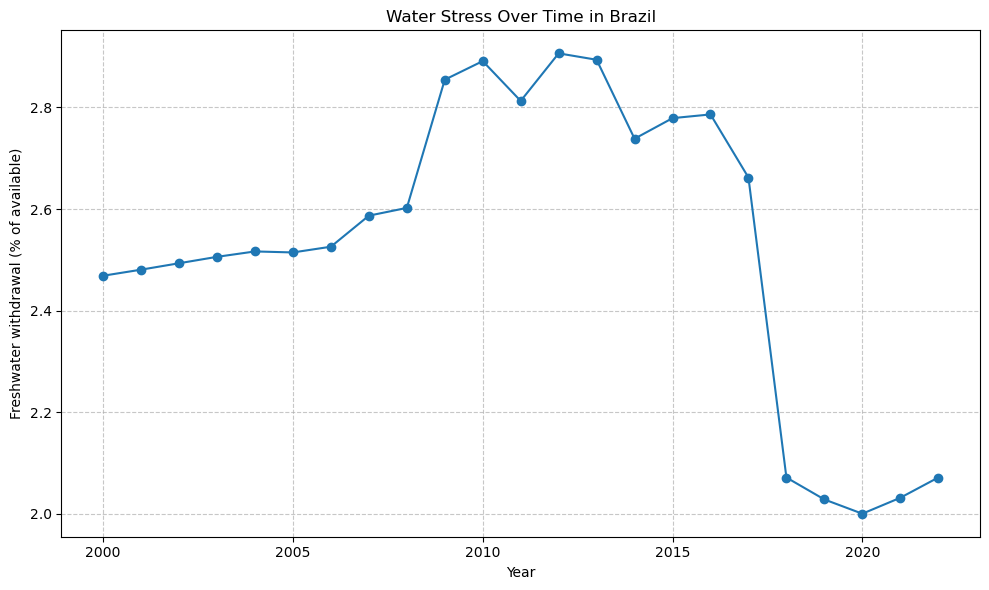

In [8]:
import wbdata
import pandas as pd
import matplotlib.pyplot as plt

# Indicator: Water stress (% of available freshwater)
indicator = {"ER.H2O.FWST.ZS": "Water Stress (%)"}

# Get data for Canada from 1990–2023
df = wbdata.get_dataframe(
    indicator,
    country="BA",
    date=(pd.Timestamp("1990-01-01"), pd.Timestamp("2023-01-01"))
)

# Reset index (removes MultiIndex)
df = df.reset_index()

# Convert date column to datetime
df["date"] = pd.to_datetime(df["date"])

# Extract year
df["year"] = df["date"].dt.year

# Sort chronologically
df = df.sort_values("year")

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df["year"], df["Water Stress (%)"], marker="o")

plt.title("Water Stress Over Time in Brazil")
plt.xlabel("Year")
plt.ylabel("Freshwater withdrawal (% of available)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


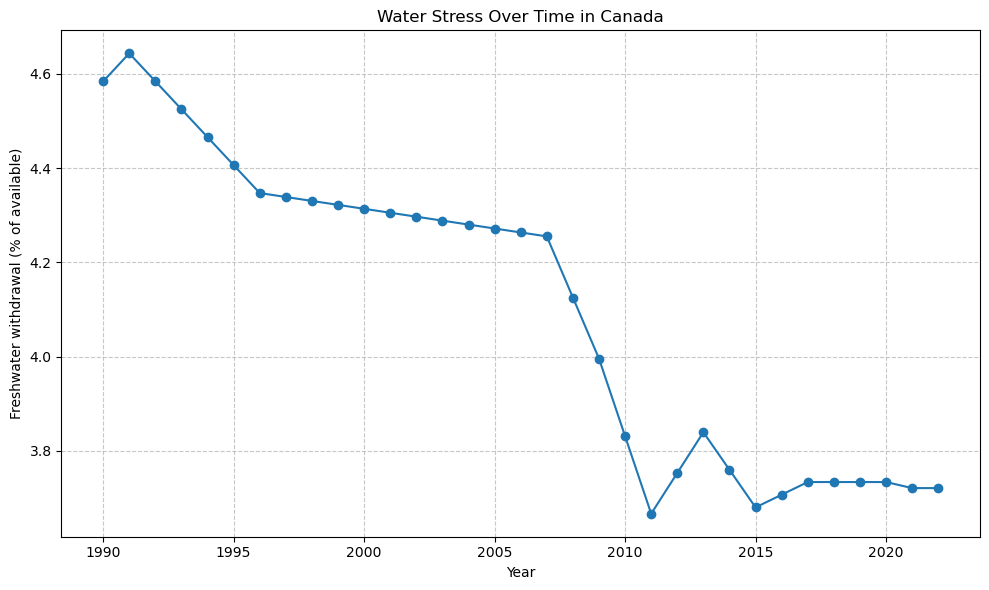

In [9]:
import wbdata
import pandas as pd
import matplotlib.pyplot as plt

# Indicator: Water stress (% of available freshwater)
indicator = {"ER.H2O.FWST.ZS": "Water Stress (%)"}

# Get data for Canada from 1990–2023
df = wbdata.get_dataframe(
    indicator,
    country="CA",
    date=(pd.Timestamp("1990-01-01"), pd.Timestamp("2023-01-01"))
)

# Reset index (removes MultiIndex)
df = df.reset_index()

# Convert date column to datetime
df["date"] = pd.to_datetime(df["date"])

# Extract year
df["year"] = df["date"].dt.year

# Sort chronologically
df = df.sort_values("year")

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df["year"], df["Water Stress (%)"], marker="o")

plt.title("Water Stress Over Time in Canada")
plt.xlabel("Year")
plt.ylabel("Freshwater withdrawal (% of available)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


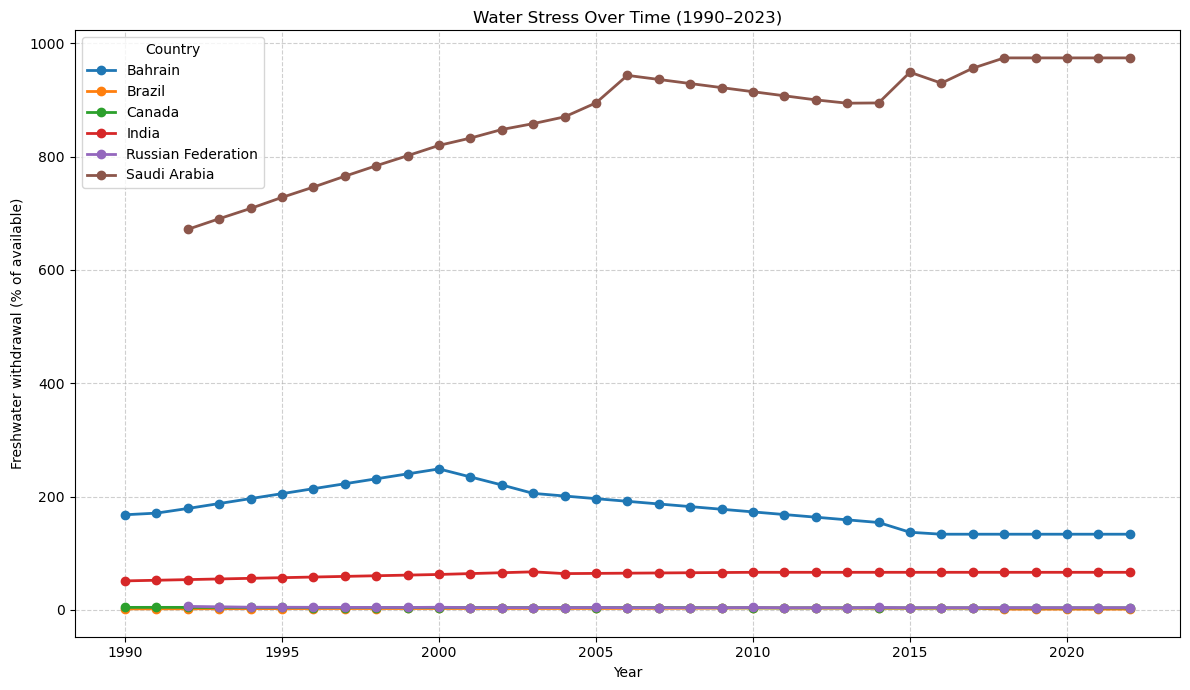

In [10]:
import wbdata
import pandas as pd
import matplotlib.pyplot as plt

# Indicator
indicator = {"ER.H2O.FWST.ZS": "Water Stress (%)"}

# Countries
countries = ["BH", "SA", "IN", "BR", "RU", "CA"]

# Date range
date_range = (pd.Timestamp("1990-01-01"), pd.Timestamp("2023-01-01"))

# Fetch data
df = wbdata.get_dataframe(indicator, country=countries, date=date_range)

# Clean
df = df.reset_index()
df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].dt.year

# Pivot to wide format
wide = df.pivot_table(index="year",
                      columns="country",
                      values="Water Stress (%)").sort_index()

# Plot
plt.figure(figsize=(12, 7))

for country in wide.columns:
    plt.plot(wide.index, wide[country], marker='o', linewidth=2, label=country)

plt.title("Water Stress Over Time (1990–2023)")
plt.xlabel("Year")
plt.ylabel("Freshwater withdrawal (% of available)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Country")
plt.tight_layout()
plt.show()


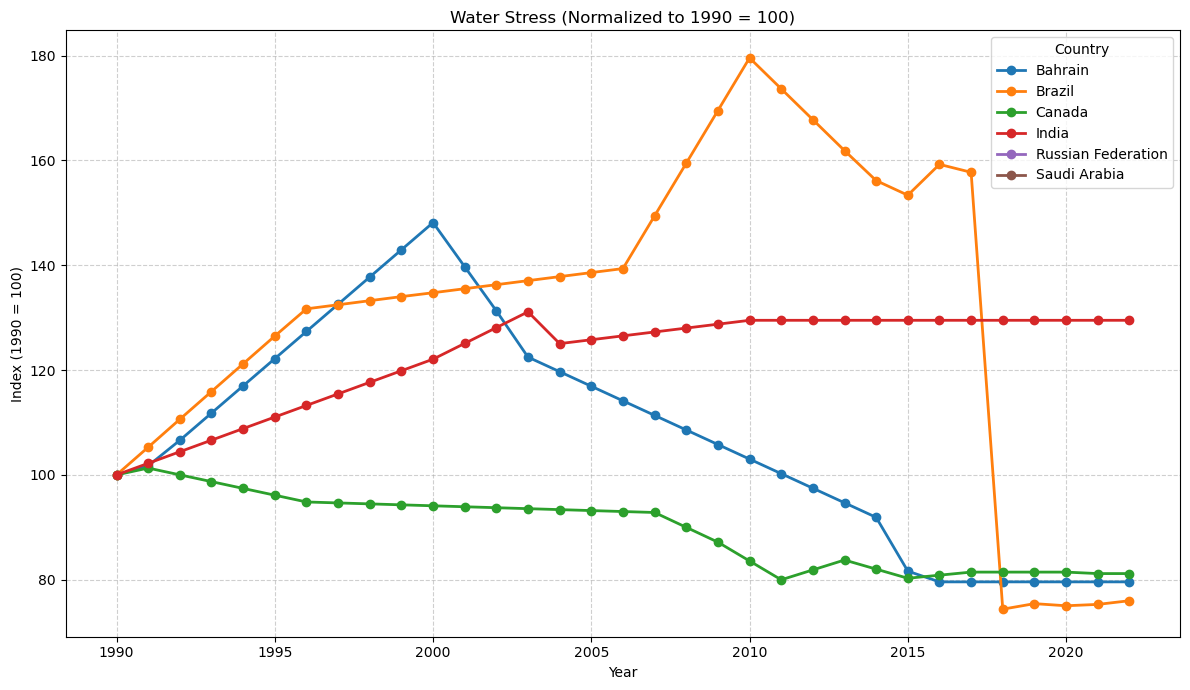

In [11]:
import wbdata
import pandas as pd
import matplotlib.pyplot as plt

# Indicator
indicator = {"ER.H2O.FWST.ZS": "Water Stress (%)"}

# Countries
countries = ["BH", "SA", "IN", "BR", "RU", "CA"]

# Date range
date_range = (pd.Timestamp("1990-01-01"), pd.Timestamp("2023-01-01"))

# Fetch data
df = wbdata.get_dataframe(indicator, country=countries, date=date_range)

# Clean
df = df.reset_index()
df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].dt.year

# Pivot to wide format
wide = df.pivot_table(index="year",
                      columns="country",
                      values="Water Stress (%)").sort_index()

# ---- NORMALIZE ----
# Divide each column by its first available value and multiply by 100
wide_normalized = wide.div(wide.iloc[0]) * 100

# Plot normalized data
plt.figure(figsize=(12, 7))

for country in wide_normalized.columns:
    plt.plot(wide_normalized.index,
             wide_normalized[country],
             marker='o',
             linewidth=2,
             label=country)

plt.title("Water Stress (Normalized to 1990 = 100)")
plt.xlabel("Year")
plt.ylabel("Index (1990 = 100)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Country")
plt.tight_layout()
plt.show()


Base year with full data: 1992


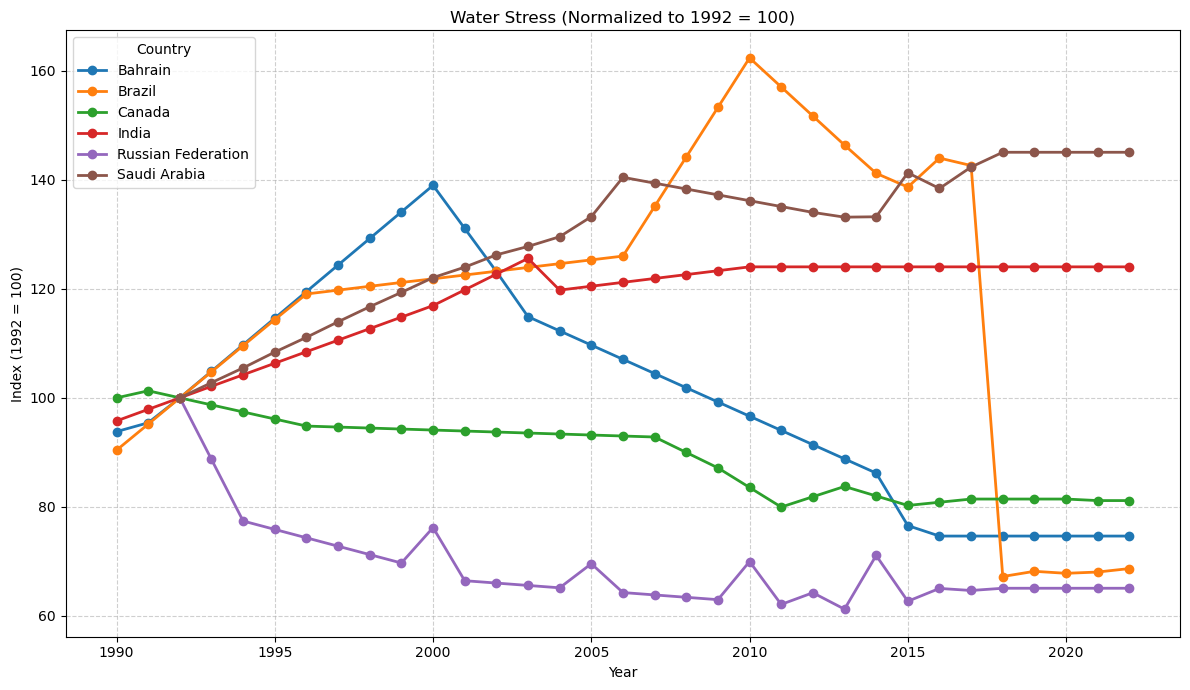

In [12]:
import wbdata
import pandas as pd
import matplotlib.pyplot as plt

# Indicator
indicator = {"ER.H2O.FWST.ZS": "Water Stress (%)"}

# Countries
countries = ["BH", "SA", "IN", "BR", "RU", "CA"]

# Date range
date_range = (pd.Timestamp("1990-01-01"), pd.Timestamp("2023-01-01"))

# Fetch data
df = wbdata.get_dataframe(indicator, country=countries, date=date_range)

# Clean
df = df.reset_index()
df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].dt.year

# Pivot to wide format
wide = (
    df.pivot_table(index="year", columns="country", values="Water Stress (%)")
      .sort_index()
)

# ---- FIND FIRST YEAR WITH FULL DATA ----
full_years = wide.dropna().index
if len(full_years) == 0:
    raise ValueError("No year has complete data for all countries in this range.")

base_year = int(full_years[0])
print(f"Base year with full data: {base_year}")

# ---- NORMALIZE TO BASE YEAR = 100 ----
wide_normalized = wide.div(wide.loc[base_year]) * 100

# Plot normalized data
plt.figure(figsize=(12, 7))

for country in wide_normalized.columns:
    plt.plot(
        wide_normalized.index,
        wide_normalized[country],
        marker="o",
        linewidth=2,
        label=country
    )

plt.title(f"Water Stress (Normalized to {base_year} = 100)")
plt.xlabel("Year")
plt.ylabel(f"Index ({base_year} = 100)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Country")
plt.tight_layout()
plt.show()
